Forward Selection - File: /content/CS205_small_Data__33.txt, Features: [11, 10, 4], Accuracy: 0.98


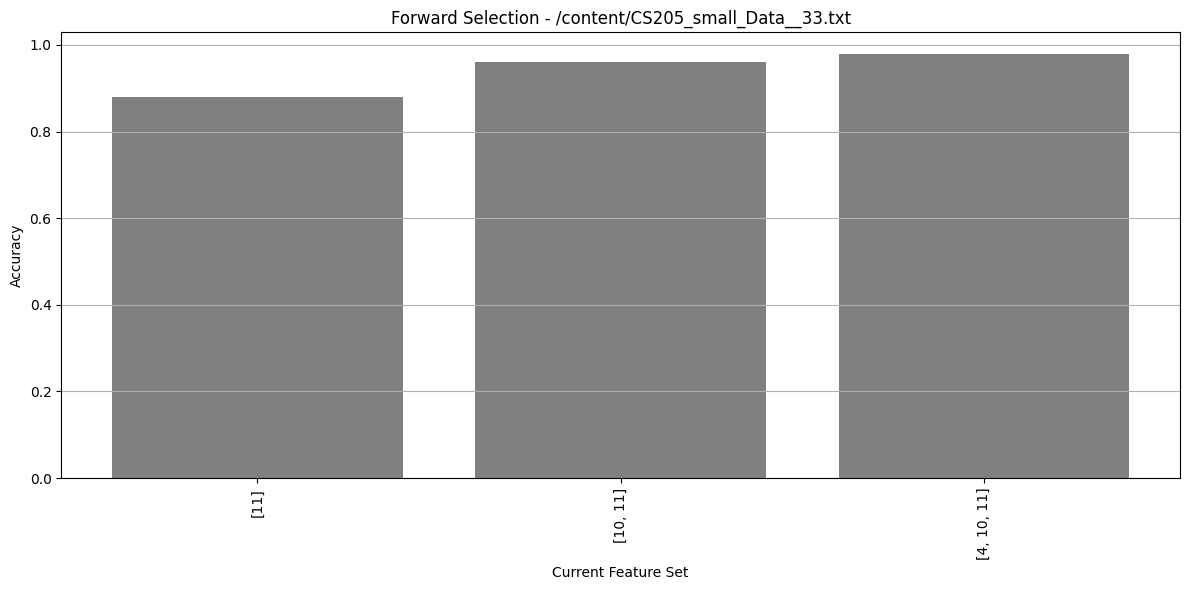

Backward Elimination - File: /content/CS205_small_Data__33.txt, Features: [1, 4, 6, 7, 8, 9, 10, 11, 12], Accuracy: 0.85


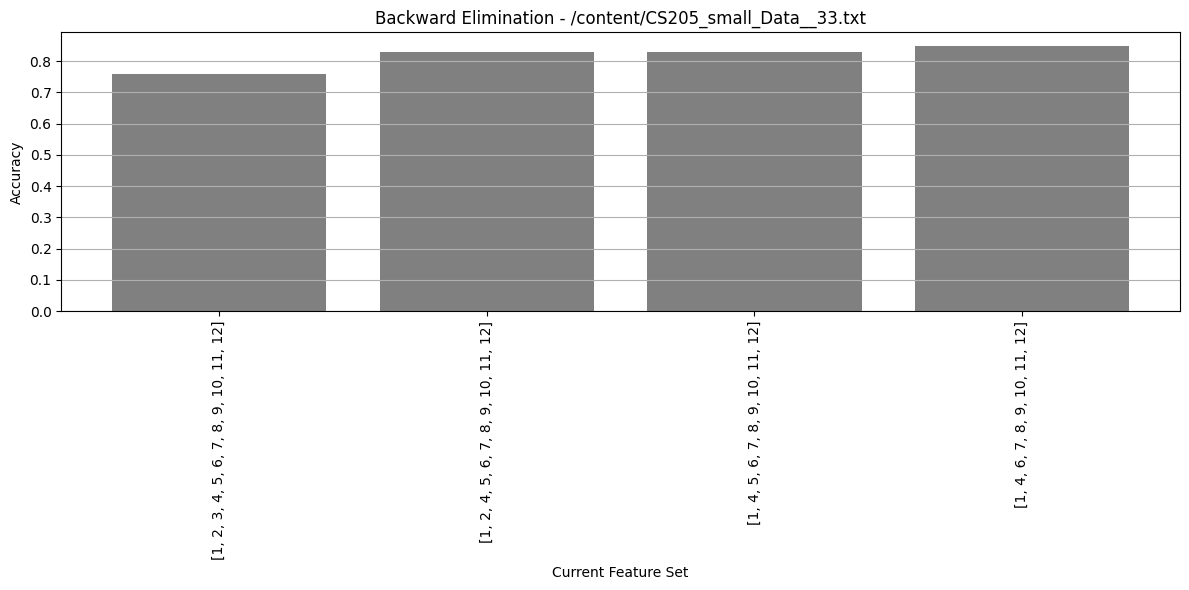

Forward Selection - File: /content/CS205_large_Data__29.txt, Features: [43, 28], Accuracy: 0.977


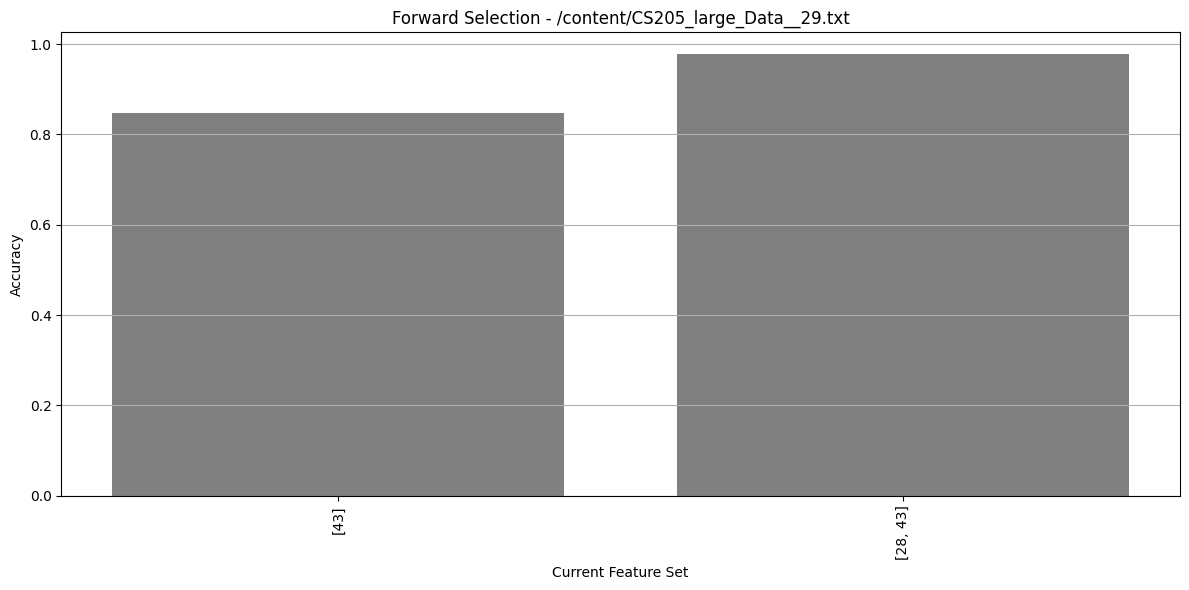

Backward Elimination - File: /content/CS205_large_Data__29.txt, Features: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50], Accuracy: 0.746


<ipython-input-12-c801fc79cb75>:97: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


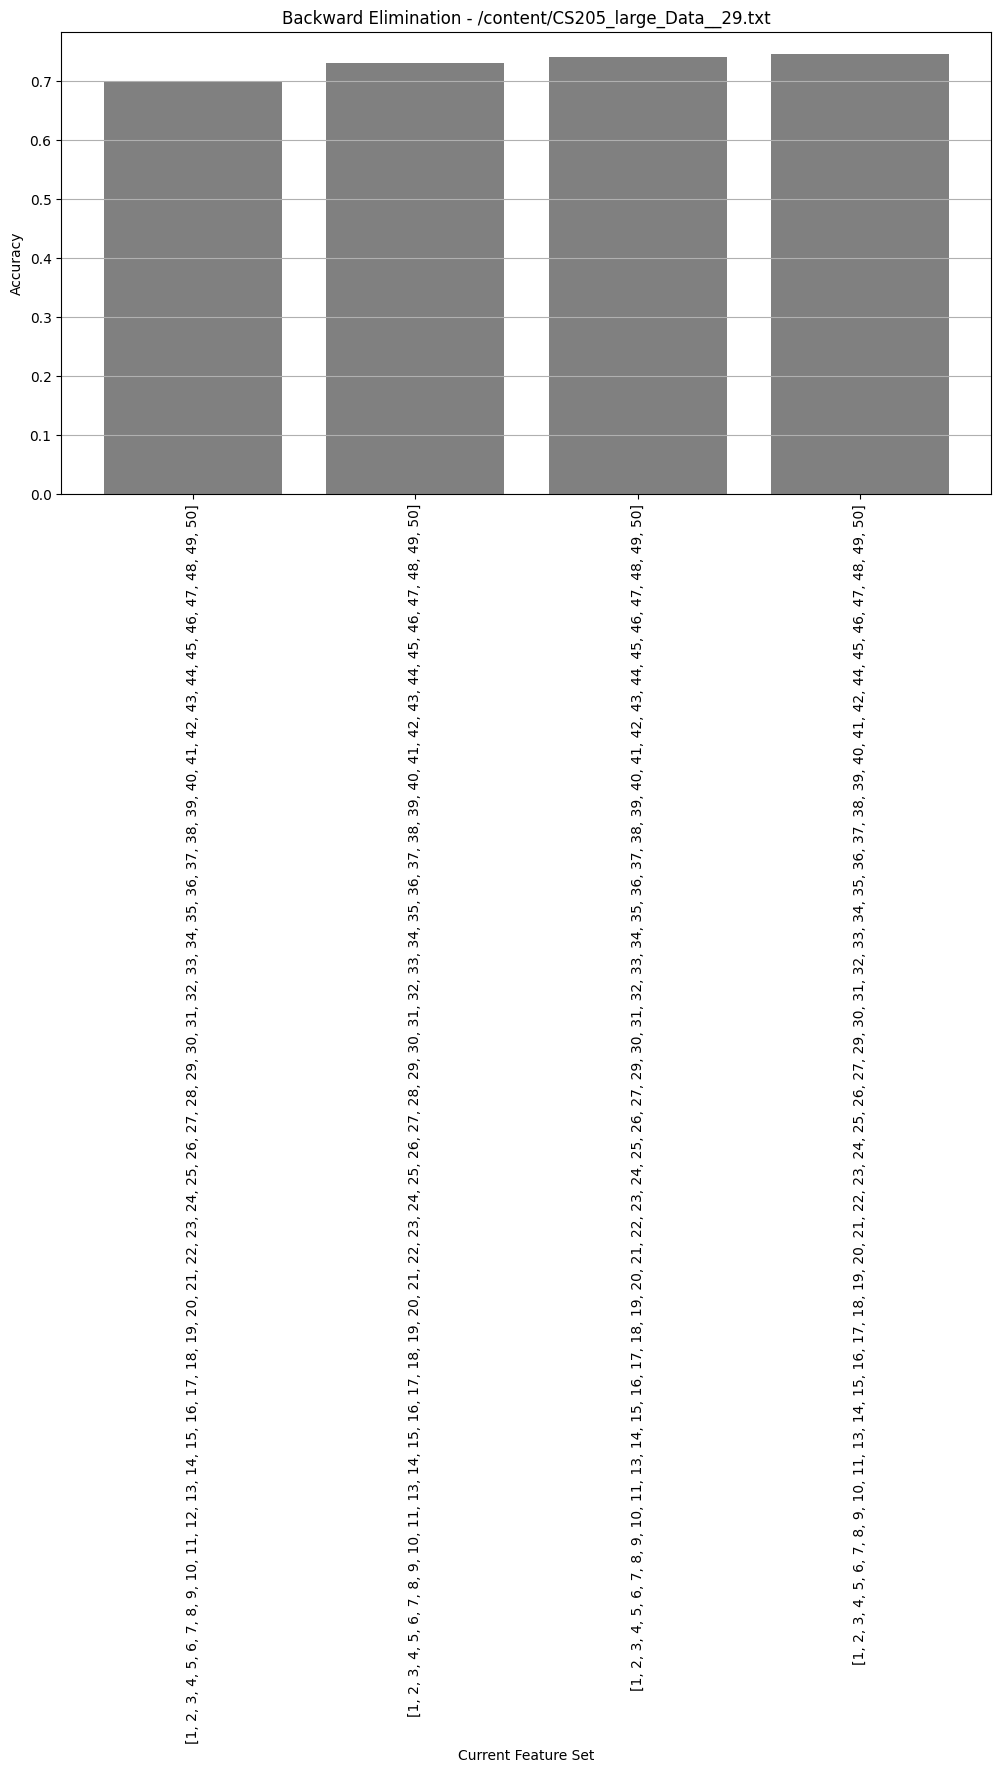

In [12]:
def nearest_neighbor(train_data, test_instance):
    distances = np.linalg.norm(train_data[:, 1:] - test_instance[1:], axis=1) #finds Ecu distance by np method
    nearest_index = np.argmin(distances) #finds the index of the nearest neighbor
    return train_data[nearest_index, 0]

def evaluate_features(train_data, test_data, features):
    correct_predictions = 0 #create a var for correct predictions
    for instance in test_data:
        prediction = nearest_neighbor(train_data[:, [0] + features], instance[[0] + features]) #predicts all the points
        if prediction == instance[0]:
            correct_predictions += 1 #add count if successfully predicted
    return correct_predictions / len(test_data) #output the accuracy

def split_data(data, test_ratio=0.2):
    np.random.shuffle(data) #Shuffle the data for random, which could leads to different output for every run
    test_size = int(len(data) * test_ratio) #Used 20% for testing and 80% for running
    test_data = data[:test_size]
    train_data = data[test_size:]
    return train_data, test_data #return the train and test set

def forward_selection_with_tracking(train_data, test_data):
    current_features = []
    best_accuracy = 0
    accuracies = []
    feature_sets = []

    for i in range(1, train_data.shape[1]): #nested for loop that will run (N^2) times, where N is number of features
        best_feature = None
        for feature in range(1, train_data.shape[1]):
            if feature not in current_features:
                accuracy = evaluate_features(train_data, test_data, current_features + [feature])
                if accuracy > best_accuracy:  # Update best accuracy and feature
                    best_accuracy = accuracy
                    best_feature = feature
        if best_feature:
            current_features.append(best_feature)
            accuracies.append(best_accuracy)
            feature_sets.append(list(current_features))
        else:
            break
    return current_features, best_accuracy, accuracies, feature_sets
def backward_elimination_with_tracking(train_data, test_data, accuracy_threshold=0.0):
    current_features = list(range(1, train_data.shape[1]))
    best_accuracy = evaluate_features(train_data, test_data, current_features)
    accuracies = [best_accuracy]
    feature_sets = [list(current_features)]

    while len(current_features) > 1:
        feature_to_remove = None
        best_temp_accuracy = best_accuracy

        for feature in current_features:
            temp_features = list(current_features)
            temp_features.remove(feature)
            accuracy = evaluate_features(train_data, test_data, temp_features)

            if accuracy >= best_temp_accuracy: #keeps track of current lowest accuracy feature
                best_temp_accuracy = accuracy
                feature_to_remove = feature

        if feature_to_remove is None or best_temp_accuracy < accuracy_threshold: #stop threshhold when performance won't improve by eliminating one feature
            break

        current_features.remove(feature_to_remove) #remove the feautue with the lowest accuracy
        best_accuracy = best_temp_accuracy
        accuracies.append(best_accuracy)
        feature_sets.append(list(current_features))

    return current_features, best_accuracy, accuracies, feature_sets


import matplotlib.pyplot as plt

def plot_accuracies(accuracies, feature_sets, title):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o')
    plt.title(title)
    plt.xlabel('Number of Features')
    plt.ylabel('Accuracy')
    plt.xticks(range(1, len(accuracies) + 1), [len(fs) for fs in feature_sets])
    plt.grid(True)
    plt.show()

import matplotlib.pyplot as plt

def plot_accuracies(accuracies, feature_sets, title):
    # Convert feature sets to strings for plotting
    feature_sets_str = [f"{sorted(fs)}" for fs in feature_sets]

    plt.figure(figsize=(12, 6))
    plt.bar(range(len(accuracies)), accuracies, color='gray')
    plt.xticks(range(len(accuracies)), feature_sets_str, rotation=90)
    plt.title(title)
    plt.xlabel('Current Feature Set')
    plt.ylabel('Accuracy')
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

def main():
    file_paths = ['/content/CS205_small_Data__33.txt', '/content/CS205_large_Data__29.txt']
    for file_path in file_paths:
        data = load_data(file_path)
        train_data, test_data = split_data(data)

        # Perform Forward Selection with Tracking
        fwd_features, fwd_accuracy, fwd_accuracies, fwd_feature_sets = forward_selection_with_tracking(train_data, test_data)
        print(f"Forward Selection - File: {file_path}, Features: {fwd_features}, Accuracy: {fwd_accuracy}")
        plot_accuracies(fwd_accuracies, fwd_feature_sets, f"Forward Selection - {file_path}")

        # Perform Backward Elimination with Tracking
        bwd_features, bwd_accuracy, bwd_accuracies, bwd_feature_sets = backward_elimination_with_tracking(train_data, test_data)
        print(f"Backward Elimination - File: {file_path}, Features: {bwd_features}, Accuracy: {bwd_accuracy}")
        plot_accuracies(bwd_accuracies, bwd_feature_sets, f"Backward Elimination - {file_path}")

if __name__ == "__main__":
    main()



Welcome to Xiao Fan's Feature Selection Algorithm.
Type the number of the file to test:
1) Smaller Data Set
2) Bigger Data Set
Enter 1 or 2: 2
Type the number of the algorithm you want to run.
1) Forward Selection
2) Backward Elimination
Enter 1 or 2: 2
Backward Elimination - File: /content/CS205_large_Data__29.txt, Features: [1, 2, 3, 4, 5, 7, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50], Accuracy: 0.75, Time cost:381.505 seconds


<ipython-input-12-c801fc79cb75>:97: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


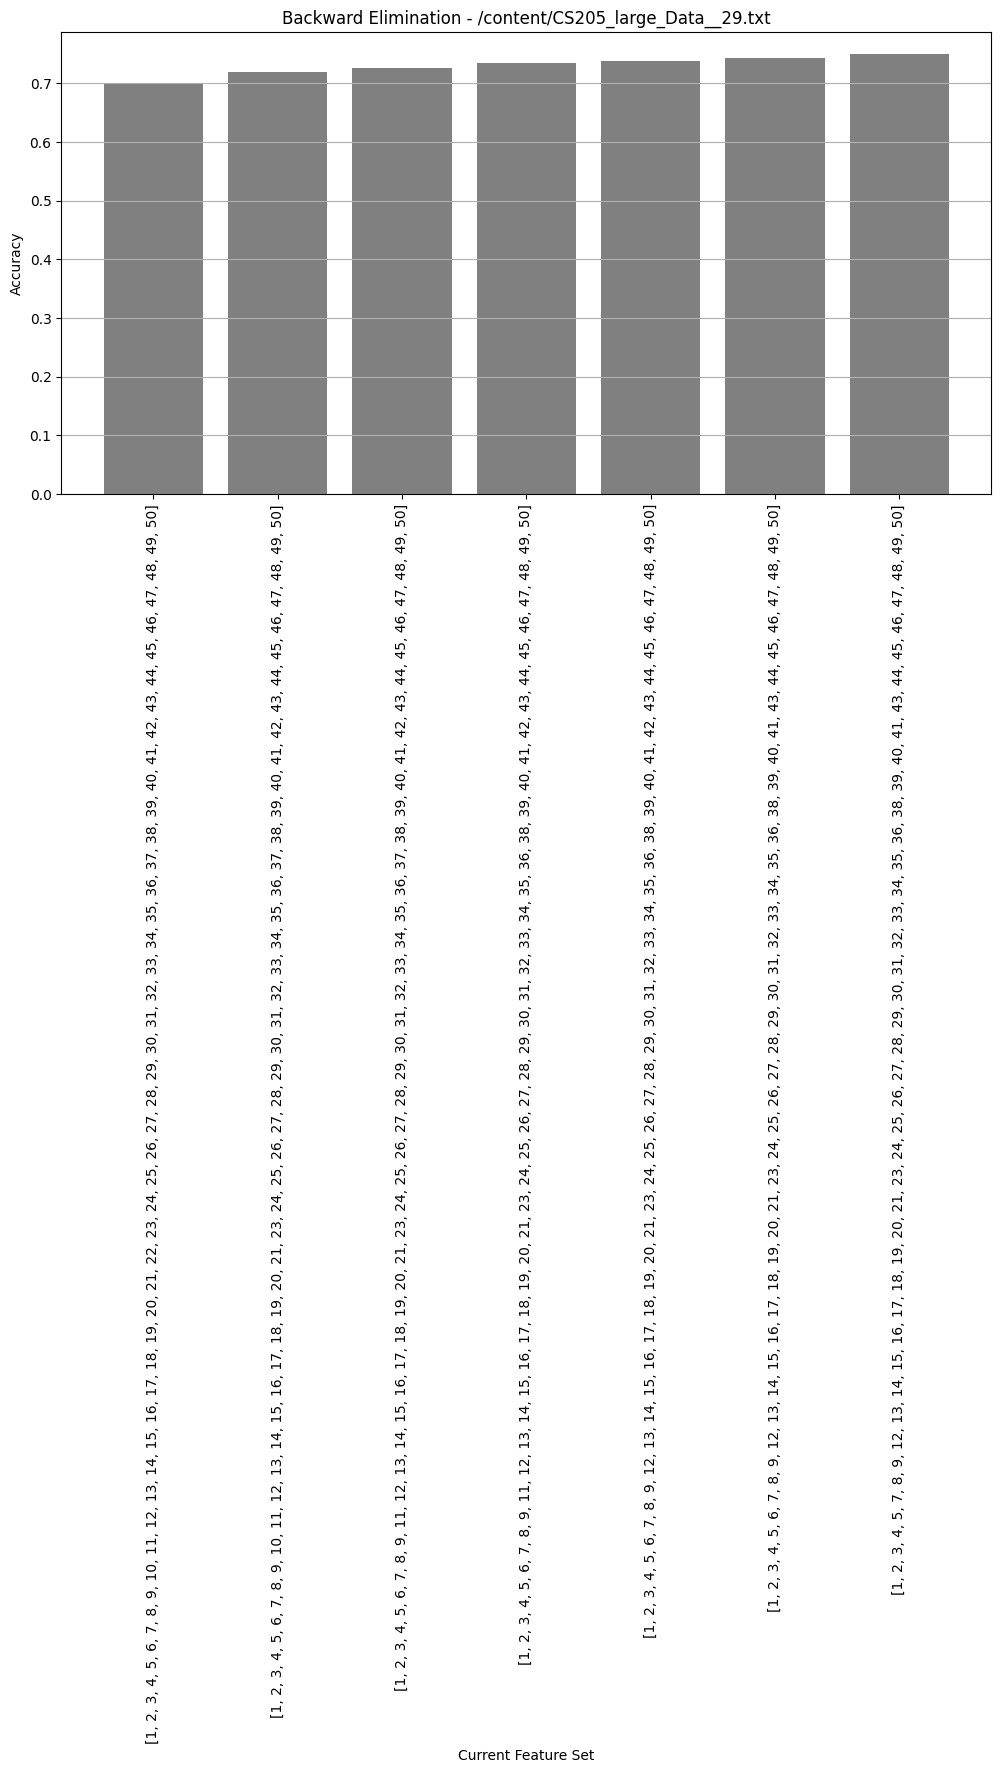

In [34]:
def main():
    file_paths = {
        '1': '/content/CS205_small_Data__33.txt',
        '2': '/content/CS205_large_Data__29.txt'
    }

    print("Welcome to Xiao Fan's Feature Selection Algorithm.")
    print("Type the number of the file to test:")
    print("1) Smaller Data Set")
    print("2) Bigger Data Set")

    choice = input("Enter 1 or 2: ").strip()

    if choice not in file_paths:
        print("Invalid choice. Please enter 1 or 2.")
        return

    file_path = file_paths[choice]
    data = load_data(file_path)
    train_data, test_data = split_data(data)

    print("Type the number of the algorithm you want to run.")
    print("1) Forward Selection")
    print("2) Backward Elimination")

    algorithm_choice = input("Enter 1 or 2: ").strip()

    if algorithm_choice == '1':
        # Perform Forward Selection with Tracking
        current_time = time.time()
        fwd_features, fwd_accuracy, fwd_accuracies, fwd_feature_sets = forward_selection_with_tracking(train_data, test_data)
        end_time = time.time()

        print(f"Forward Selection - File: {file_path}, Features: {fwd_features}, Accuracy: {fwd_accuracy}, Time cost: {round((end_time-current_time),3)} seconds")

        plot_accuracies(fwd_accuracies, fwd_feature_sets, f"Forward Selection - {file_path}")
    elif algorithm_choice == '2':
        # Perform Backward Elimination with Tracking
        current_time = time.time()
        bwd_features, bwd_accuracy, bwd_accuracies, bwd_feature_sets = backward_elimination_with_tracking(train_data, test_data)
        end_time = time.time()
        print(f"Backward Elimination - File: {file_path}, Features: {bwd_features}, Accuracy: {bwd_accuracy}, Time cost:{round((end_time-current_time),3)} seconds")
        plot_accuracies(bwd_accuracies, bwd_feature_sets, f"Backward Elimination - {file_path}")
    else:
        print("Invalid choice. Please enter 1 or 2.")
        return

if __name__ == "__main__":
    main()


In [11]:
#test code for performance comparsion between manully calculation of eculidean vs np.linalg.norm
import numpy as np
import time

# Generate random points
point1 = np.random.rand(1000000)
point2 = np.random.rand(1000000)

# Using np.linalg.norm
start_time = time.time()
dist_np = np.linalg.norm(point1 - point2)
end_time = time.time()
print(f"np.linalg.norm distance: {dist_np}, Time: {end_time - start_time}")

# Manual calculation
def euclidean_distance_manual(point1, point2):
    distance = 0.0
    for i in range(len(point1)):
        distance += (point1[i] - point2[i]) ** 2
    return math.sqrt(distance)

start_time = time.time()
dist_manual = euclidean_distance_manual(point1, point2)
end_time = time.time()
print(f"Manual distance: {dist_manual}, Time: {end_time - start_time}")


np.linalg.norm distance: 408.3000197248596, Time: 0.01355886459350586
Manual distance: 408.3000197248636, Time: 0.8434064388275146
